<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chpater 3 넘파이로 무작위 시뮬레이션 수행하기

## 넘파이로 무작위 동전 뒺딥기와 주사위 던지기 시뮬레이션하기

## 3-1

In [110]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트를 설정
rc('font', family='Malgun Gothic')  # 또는 'Malgun Gothic', 'AppleGothic' 등

In [111]:
import numpy as np

## 3-2

In [112]:
die_roll = np.random.randint(1, 7)
assert 1 <= die_roll <= 6

## 3-3

In [113]:
np.random.seed(0)
die_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert die_rolls == [5, 6, 1]

## 3-4

In [114]:
np.random.seed(0)
coin_flip = np.random.randint(0, 2)
print(f"동전은 {'앞면' if coin_flip == 1 else '뒷면'} 으로 떨어졌습니다.")

동전은 뒷면 으로 떨어졌습니다.


## 3-5

In [115]:
np.random.seed(0)
def frequency_heads(coin_flip_sequence):
  total_heads = len([head for head in coin_flip_sequence if head == 1])
  return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"동전 앞면이 관측된 빈도는 {freq_heads} 입니다")


동전 앞면이 관측된 빈도는 0.8 입니다


## 3-6

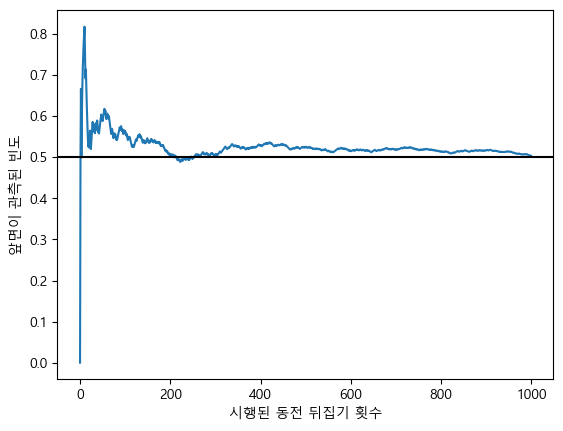

In [116]:
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
  coin_flips.append(np.random.randint(0, 2))
  frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('시행된 동전 뒤집기 횟수')
plt.ylabel('앞면이 관측된 빈도')
plt.show()

## 3-7

In [117]:
np.random.seed(0)
print("동전을 한 번 뒤집어봅니다.")
coin_flip = np.random.binomial(1, 0.7)
print(f"편향된 동전은 {'앞면' if coin_flip == 1 else '뒷면'}으로 떨어졌습니다.")

print("\n동전을 열 번 뒤집어봅니다.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, .7)
print((f"{number_coin_flips}번의 편향된 동전 뒤집기 중 앞면은 \
{head_count}번 관측되었습니다."))

동전을 한 번 뒤집어봅니다.
편향된 동전은 앞면으로 떨어졌습니다.

동전을 열 번 뒤집어봅니다.
10번의 편향된 동전 뒤집기 중 앞면은 6번 관측되었습니다.


## 3-8

In [118]:
np.random.seed(0)
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"동전의 앞면이 관측된 빈도는 {frequency} 입니다")

동전의 앞면이 관측된 빈도는 0.697 입니다


## 3-9

In [119]:
np.random.seed(0)
assert np.random.binomial(1000, 0.7) / 1000 == 0.697
for i in range(1, 6):
  head_count = np.random.binomial(1000, 0.7)
  frequency = head_count / 1000
  print(f"{i} 번째 반복에서의 빈도는 {frequency} 입니다")
  if frequency == 0.7:
    print("빈도와 실제 확률이 일치합니다!\n")


1 번째 반복에서의 빈도는 0.69 입니다
2 번째 반복에서의 빈도는 0.7 입니다
빈도와 실제 확률이 일치합니다!

3 번째 반복에서의 빈도는 0.707 입니다
4 번째 반복에서의 빈도는 0.702 입니다
5 번째 반복에서의 빈도는 0.699 입니다


## 히스토그램과 넘파이 배열로 계산하는 신뢰 구간

## 3-10

In [120]:
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

## 3-11

In [121]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)

## 3-12

In [122]:
assert head_count_array.tolist() == head_count_list

## 3-13

In [123]:
new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array) == True

## 3-14

In [124]:
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000
                                    for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000, head_count_list))

## 3-15

In [125]:
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


## 3-16

In [126]:
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"관측된 최소 빈도: {min_freq}")
print(f"관측된 최대 빈도: {max_freq}")
print(f"빈도의 범위: {max_freq - min_freq}")


관측된 최소 빈도: 0.656
관측된 최대 빈도: 0.733
빈도의 범위: 0.07699999999999996


## 3-17

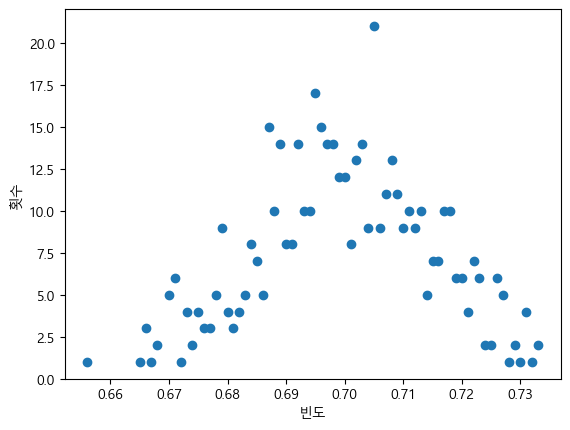

In [127]:
from collections import defaultdict

frequency_counts = defaultdict(int)
for frequency in frequency_array:
  frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]

plt.scatter(frequencies, counts)
plt.xlabel('빈도')
plt.ylabel('횟수')
plt.show()


## 3-18

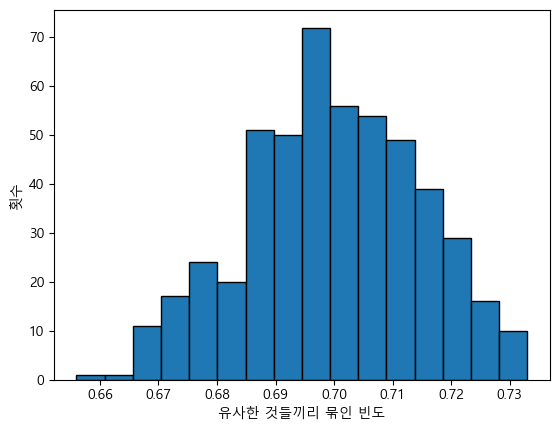

In [128]:
plt.hist(frequency_array, bins='auto', edgecolor='black')
plt.xlabel('유사한 것들끼리 묶인 빈도')
plt.ylabel('횟수')
plt.show()

## 3-19

빈의 개수: 16


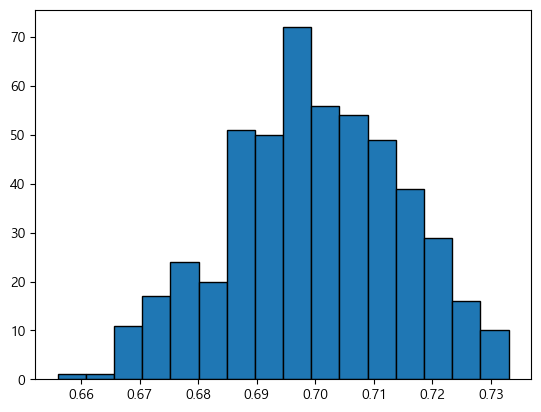

In [129]:
counts, _, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')

print(f"빈의 개수: {counts.size}")

## 3-20

빈의 너비: 0.004812499999999997


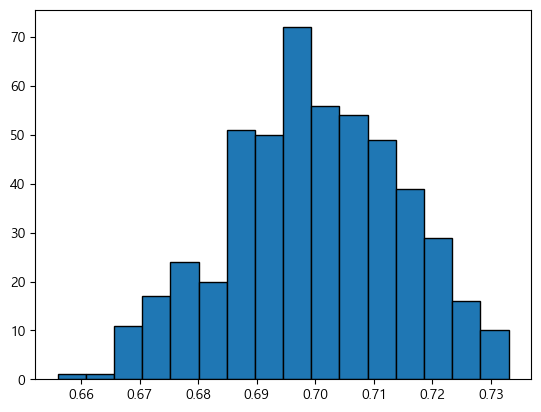

In [130]:
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')

bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"빈의 너비: {bin_width}")

## 3-21

In [131]:
def output_bin_coverage(i):
  count = int(counts[i])
  range_start, range_end = bin_edges[i], bin_edges[i+1]
  range_string = f"{range_start} - {range_end}"
  print((f"빈도의 범위 {range_string}에 대한 빈은 "
  f"{count}개의 요소를 포함합니다."))

output_bin_coverage(0)
output_bin_coverage(5)

빈도의 범위 0.656 - 0.6608125에 대한 빈은 1개의 요소를 포함합니다.
빈도의 범위 0.6800625 - 0.684875에 대한 빈은 20개의 요소를 포함합니다.


## 3-22

In [132]:
assert counts[counts.argmax()] == counts.max()

## 3-23

In [133]:
output_bin_coverage(counts.argmax())

빈도의 범위 0.6945 - 0.6993125에 대한 빈은 72개의 요소를 포함합니다.


## 3-24

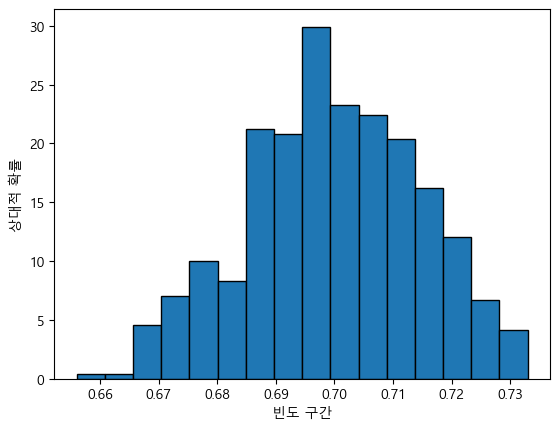

In [134]:
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto',
                                     edgecolor='black', density=True)

plt.xlabel('빈도 구간')
plt.ylabel('상대적 확률')
plt.show()

## 3-25

In [135]:
assert likelihoods.sum() * bin_width == 1.0

## 3-26

In [136]:
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"샘플링된 빈도가 {range_string} 구간에 속할 확률은 {area} 입니다")

샘플링된 빈도가 0.6945 - 0.6993125 구간에 속할 확률은 0.144 입니다


## 3-27

In [137]:
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index-1, peak_index+2)
area = likelihoods[start_index: end_index+1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"샘플링된 빈도가 {range_string} 구간에 속할 확률은 {area} 입니다")

샘플링된 빈도가 0.6896875 - 0.704125 구간에 속할 확률은 0.464 입니다


## 3-28

In [138]:
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1

        area = likelihoods[start_index: end_index + 1].sum() * bin_width

    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print((f"빈도 범위 {range_string}는 {100 * area:.2f}% 신뢰 구간을 나타냅니다"))
    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

빈도 범위 0.670438 - 0.723375는 95.40% 신뢰 구간을 나타냅니다


(3, 14)

## 3-29

In [139]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

## 3-30

빈도 범위 0.670429 - 0.727857는 95.42% 신뢰 구간을 나타냅니다


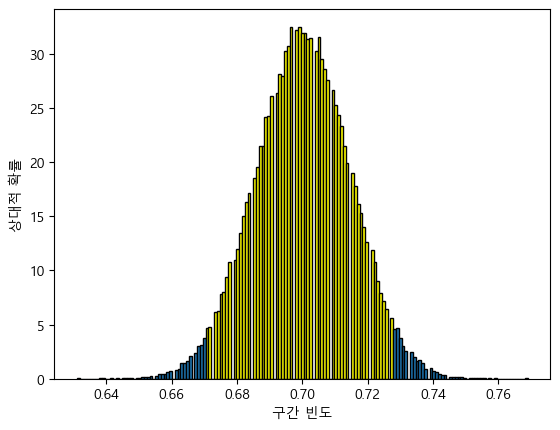

In [140]:
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
                                           edgecolor='black', density=True)

bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')

plt.xlabel('구간 빈도')
plt.ylabel('상대적 확률')
plt.show()

## 3-31

빈도 범위 0.695769 - 0.703708는 95.06% 신뢰 구간을 나타냅니다


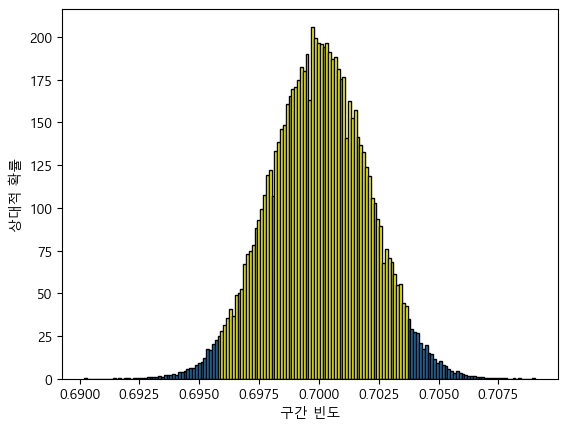

In [141]:
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')

plt.xlabel('구간 빈도')
plt.ylabel('상대적 확률')
plt.show()

## 3-32

In [142]:
np.random.seed(0)
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

빈도 범위 0.695769 - 0.703708는 95.06% 신뢰 구간을 나타냅니다


(47, 114)

## 신뢰 구간으로 편향된 카드 덱 분석하기

## 3-33

In [143]:
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards+1)

## 3-34

In [144]:
black_card_count = total_cards - red_card_count
assert black_card_count != red_card_count

## 3-35

In [145]:
def get_matching_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space if event_condition(outcome)])

def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)

    event_size = sum(generic_sample_space[outcome] for outcome in event)
    return event_size / sum(generic_sample_space.values())

In [146]:
weighted_sample_space = {'red_card': red_card_count, 'black_card': black_card_count}
prob_red = compute_event_probability(lambda x: x == 'red_card', weighted_sample_space)

## 3-36

In [147]:
assert prob_red == red_card_count / total_cards

## 3-37

In [148]:
np.random.seed(0)
color = 'red' if np.random.binomial(1, prob_red) else 'black'
print(f"뒤섞인 카드 덱에서 꺼낸 첫 번째 카드는 {color} 입니다")

뒤섞인 카드 덱에서 꺼낸 첫 번째 카드는 red 입니다


## 3-38

In [149]:
np.random.seed(0)
red_count = np.random.binomial(10, prob_red)
print(f"10번 카드를 뒤섞었을 때 {red_count} 번이 빨간색입니다")

10번 카드를 뒤섞었을 때 8 번이 빨간색입니다


## 3-39

In [150]:
np.random.seed(0)
red_card_count_array = np.random.binomial(50000, prob_red, 100000)
frequency_array = red_card_count_array / 50000

likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

빈도 범위 0.842865 - 0.849139는 95.16% 신뢰 구간을 나타냅니다


## 3-40

In [151]:
range_start = round(0.842771 * total_cards)
range_end = round(0.849139 * total_cards)
print(f"빨간색 카드 개수는 {range_start}와 {range_end} 사이입니다")

빨간색 카드 개수는 44와 44 사이입니다


## 3-41

In [152]:
if red_card_count == 44:
    print('맞췄습니다! 카드 덱에는 44장의 빨간색 카드가 들어 있습니다')
else:
    print('저런! 샘플링 추정이 틀렸습니다')

맞췄습니다! 카드 덱에는 44장의 빨간색 카드가 들어 있습니다


## 순열로 카드 뒤섞기

## 3-42

In [153]:
np.random.seed(0)
card_deck = [1, 1, 0, 0]
np.random.shuffle(card_deck)
print(card_deck)

[0, 0, 1, 1]


## 3-43

In [154]:
np.random.seed(0)
unshuffled_deck = [1, 1, 0, 0]
shuffled_deck = np.random.permutation(unshuffled_deck)
assert unshuffled_deck == [1, 1, 0, 0]
print(shuffled_deck)

[0 0 1 1]


## 3-44

In [155]:
import itertools
for permutation in list(itertools.permutations(unshuffled_deck))[:3]:
    print(permutation)

(1, 1, 0, 0)
(1, 1, 0, 0)
(1, 0, 1, 0)


## 3-45

In [156]:
for permutation in list(itertools.permutations([0, 1, 2, 3]))[:3]:
    print(permutation)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)


## 3-46

In [157]:
weighted_sample_space = defaultdict(int)
for permutation in itertools.permutations(unshuffled_deck):
    weighted_sample_space[permutation] += 1

for permutation, count in weighted_sample_space.items():
    print(f"순열 {permutation}은 {count}번 발생합니다")

순열 (1, 1, 0, 0)은 4번 발생합니다
순열 (1, 0, 1, 0)은 4번 발생합니다
순열 (1, 0, 0, 1)은 4번 발생합니다
순열 (0, 1, 1, 0)은 4번 발생합니다
순열 (0, 1, 0, 1)은 4번 발생합니다
순열 (0, 0, 1, 1)은 4번 발생합니다


## 3-47

In [158]:
sample_space = set(itertools.permutations(unshuffled_deck))
event_condition = lambda x: list(x) == unshuffled_deck
prob = compute_event_probability(event_condition, sample_space)
assert prob == 1 / len(sample_space)
print(f"해당 뒤섞기 작업이 카드 덱을 변경하지 않을 확률은 {prob} 입니다.")

해당 뒤섞기 작업이 카드 덱을 변경하지 않을 확률은 0.16666666666666666 입니다.


## 3-48

In [159]:
red_cards = 5 * [1]
black_cards = 5 * [0]
unshuffled_deck = red_cards + black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
print(f"10 장의 카드로 구성된 카드 덱의 표본 공간에는 {len(sample_space)}개의 요소가 존재합니다")

10 장의 카드로 구성된 카드 덱의 표본 공간에는 252개의 요소가 존재합니다
